matplotlib: 3.5.1


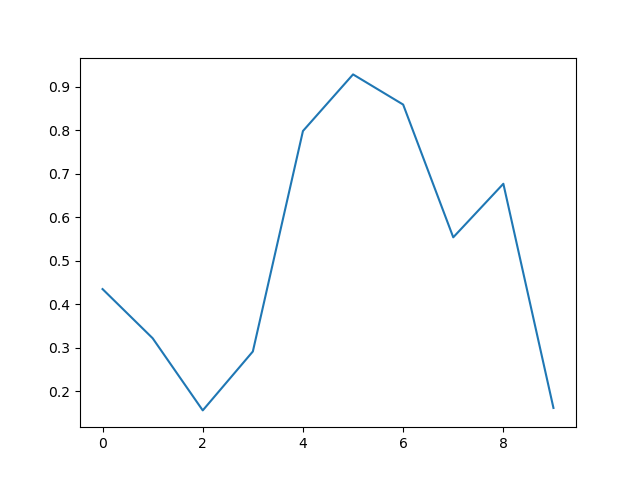

In [3]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

import matplotlib


DECAY_DURATION = 2
print('matplotlib: {}'.format(matplotlib.__version__))
class Video():

    def __init__(self, framerate: float = 60, decay_seconds: float = 2, frame: int = 0):
        self.decays = []
        self.framerate = framerate
        self.frame = frame
        
    @property
    def decay_frames(self):
        return DECAY_DURATION*self.framerate

    def get_visible_decays(self):
        visible_decays = filter(lambda d: 0 <= (self.frame - d.frame) < self.decay_frames, self.decays)

        return visible_decays

class Decay():

    def __init__(self, frame, x, y):
        self.x = x
        self.y = y
        self.frame = frame

    def __str__(self):
        return f'<Decay on frame {self.frame} at ({self.x}, {self.y})>'

    def visible_on_frame(self, video):
        diff = video.frame - self.frame
        decay_frame_length = DECAY_DURATION * video.framerate
        return diff < decay_frame_length and diff >= 0

vid = Video()

def update():
    plt.gcf().clear()
    xs = []
    ys = []
    alphas = []

    visible_decays = vid.get_visible_decays()
    for d in visible_decays:
        xs.append(d.x)
        ys.append(d.y)
        alphas.append(1 - ((vid.frame - d.frame) / vid.decay_frames))

    # alphas = [(1 - (vid.frame - d.frame) / DECAY_DURATION) for d in visible_decays]

    if xs:
        plt.scatter(xs, ys, alpha=alphas)
    

def click_handler(event):

    if event.button == 1:
        event.xdata
        
        event.x, event.y, event.xdata, event.ydata
        decay = Decay(vid.frame, event.xdata, event.ydata)
        vid.decays.append(decay)
        print('click!')
        update()

def key_handler(event):
    if event.key == 'left':
        vid.frame -= 1
    elif event.key == 'right':
        vid.frame += 1
    update()
    print('you pressed', event.key, event.xdata, event.ydata)




fig, ax = plt.subplots()
# matplotlib.use('tkagg')
ax.plot(np.random.rand(10))




click_cid = fig.canvas.mpl_connect('button_press_event', click_handler)
key_cid = fig.canvas.mpl_connect('key_press_event', key_handler)
plt.show()




In [2]:
plt.close()